#### 7 

In [80]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def E(u,v):
    return np.exp(u) + np.exp(2*v) + np.exp(u*v) + u**2 - 2*u*v + 2*v**2 -3*u - 2*v

In [5]:
def gradient(u,v):
    du = np.exp(u) + np.exp(u*v) * v + 2*u -2*v -3
    dv = 2*np.exp(2*v) - 2*u +4*v - 2
    
    return du, dv

u=0; v=0
for i in range(5):
    du, dv = gradient(u,v)
    u -= 0.01 * du
    v -= 0.01 * dv
    
print(E(u,v))

2.82483846609


### 13-15

#### 13

- step1 : generate N=1000 data points in x=[-1,1], y=[-1,1] using target function with 10% misclassification.
- step2 : w_lin = (X转置*X)逆矩阵*X转置 * y
- step3 : E_in and aver_E_in

In [83]:
N = 1000
x = np.zeros((N,2))
y = np.zeros(N)

for i in range(N):
    x1, x2 = np.random.uniform(-1,1,2)
    y_true = 1 if (x1**2 + x2**2)>0.6 else -1
    x[i,:] = x1,x2
    y[i] = y_true

In [84]:
# make 10% noise
index = np.random.choice(range(N), size=int(N*0.1))
y[index] *= -1

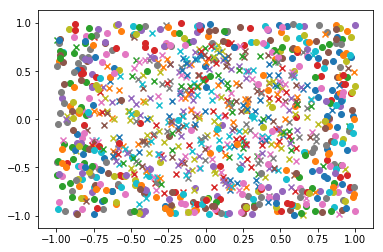

In [85]:
# plot the data points
for i in range(N):
    if y[i]==1:
        plt.scatter(x[i,0], x[i,1], marker="o")
    else:
        plt.scatter(x[i,0], x[i,1], marker="x")

In [98]:
# define a function to generate noisy data
def generate_noisy_data(N):
    x = np.zeros((N,2))
    y = np.zeros(N)

    for i in range(N):
        x1, x2 = np.random.uniform(-1,1,2)
        y_true = 1 if (x1**2 + x2**2)>0.6 else -1
        x[i,:] = x1,x2
        y[i] = y_true
        
    # make 10% noise
    index = np.random.choice(range(N), size=int(N*0.1))
    y[index] *= -1
    
    return x, y

In [100]:
num_expe = 1000  # repeat 1000 times
N = 1000  # 1000 points in dataset

aver_E_in = 0
aver_w = np.zeros(2)
for i in range(num_expe):
    # generate data
    x, y = generate_noisy_data(N)
    # use linear regression to get w_lin
    w_lin = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x)), y)
    # caculate E_in
    E_in = 1 - sum(np.sign(np.matmul(x, w_lin)) == y)/N
    aver_E_in += E_in
    aver_w += w_lin
    
aver_E_in = aver_E_in/num_expe
aver_w = aver_w/num_expe
print(aver_E_in, aver_w)

0.483629 [ 0.00208702 -0.00062115]


aver_w is quite close to 0.

#### 14

find the w~ in z space (1,x1,x2,x1x2,x1**2,x2**2).

In [109]:
def transform(x):
    x1 = x[:,0]
    x2 = x[:,1]
    z = np.zeros((N,6))
    z[:,0] = 1
    z[:,1] = x1
    z[:,2] = x2
    z[:,3] = x1*x2
    z[:,4] = x1**2
    z[:,5] = x2**2
    
    return z

In [112]:
def linear_reg(x, y):
    w_lin = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x)), y)
    return w_lin

In [113]:
z = transform(x)
w_lin_z = linear_reg(z, y)

In [114]:
w_lin_z

array([-0.99193168, -0.07158832,  0.02613756, -0.03034536,  1.55144653,
        1.61954912])

#### 15

In [117]:
num_expe = 1000  # repeat 1000 times
N = 1000  # 1000 points in dataset

aver_E_in = 0
aver_w = np.zeros(6)
for i in range(num_expe):
    # generate data
    x, y = generate_noisy_data(N)
    z = transform(x)
    # use linear regression to get w_lin
    w_lin = linear_reg(z, y)
    # caculate E_in
    E_in = 1 - sum(np.sign(np.matmul(z, w_lin)) == y)/N
    aver_E_in += E_in
    aver_w += w_lin
    
aver_E_in = aver_E_in/num_expe
aver_w = aver_w/num_expe
print(aver_E_in, aver_w)

0.119447 [ -1.00414544e+00   4.27116483e-04  -1.48702618e-03   1.39997221e-03
   1.57835839e+00   1.57338495e+00]


### 18-20 逻辑回归

#### 18-19 梯度下降

In [239]:
train_data = np.loadtxt('hw3_train.txt') 
test_data = np.loadtxt('hw3_test.txt')

print(train_data.shape, test_data.shape)

x_train, y_train = train_data[:,:20], train_data[:,20]
x_test, y_test = test_data[:,:20], test_data[:,20]

y_train = y_train.reshape(1000,1)

(1000, 21) (3000, 21)


In [240]:
w = np.random.randn(20)

eta = 0.01
T = 2000

In [241]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [242]:
for t in range(T):
    theta = sigmoid((-1)*y_train * np.matmul(x_train, w.reshape(20,1))) # shape (1000,1)
    w -= eta * np.sum(theta * ((-1)*y_train*x_train), axis=0)

In [243]:
r = np.matmul(x_test, w.reshape(20,1))
prediction = np.array([1 if i>0 else -1 for i in r])
print(1 - sum(prediction == y_test)/3000)

0.353666666667


#### 20 随机梯度下降

In [228]:
w = np.random.randn(20)

eta = 0.01
T = 2000

In [229]:
for t in range(T):
    i = t%1000
    xn = x_train[i,:]
    yn = y_train[i,:]
    theta = sigmoid((-1)*yn * np.matmul(xn, w.reshape(20,1))) # shape (1000,1)
    w -= eta * theta * ((-1)*yn*xn)

In [230]:
w

array([-0.51723417, -0.70029801,  0.0542648 ,  0.2362099 , -0.46787648,
       -0.4179025 ,  0.88807558,  0.31456556, -0.09072538,  1.13897275,
       -0.71504765,  0.12485834,  0.04100449,  0.64110614,  0.25880824,
        0.42694482, -0.27072181,  0.82188726, -0.61457751, -1.06829622])

In [231]:
r = np.matmul(x_test, w.reshape(20,1))
prediction = np.array([1 if i>0 else -1 for i in r])
print(1 - sum(prediction == y_test)/3000)

0.358


# ChangeLog
- 20180626 18-20的计算还有问题